In [13]:
import pynr as nr
import matplotlib.pyplot as plt

Load the RIT data

In [28]:
nr.nr_waveform?

Signature:
nr.nr_waveform(
    download_Q=True,
    root_folder=None,
    pycbc_format=True,
    modes=[[2, 2], [2, -2]],
    distance=100,
    inclination=0,
    coa_phase=0,
    modes_combined=True,
    tapering=True,
    RD=False,
    zero_align=True,
    extrapolation_order=2,
    resolution_level=-1,
    **args,
)
Docstring:
Function to load the waveforms from the NR catalogues. 

    Parameters
----------
code: {'SXS','RIT','MAYA'}. Select the catalogue you want the data from.
tag: eg. {'SXS:BBH:0305','RIT-BBH-0001','GT0001'}. Tag of the target waveform.
download_Q: logical, optional, Default = True. If True downloads the data from the catalogue url.
root_folder: string, optional, Default = None. If download_Q = False, it must be provided.
pycbc_format: logical, optional, Default=True. If True it provides hp, hc in the Timeseries format.

mass: Total mass in solar masses. 
modes: list of modes, optional, Default= [[2,2],[2,-2]].
distance: Distance, optional, Default = 100 Mpc.
in

In [14]:
hp_rit,hx_rit= nr.nr_waveform(code='RIT',
                              pycbc_format=True,
    rit_root_folder='/work/francisco.jimenez/RIT/Data',
    download_Q = True,
    tag = 'RIT:BBH:0001',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = False,
    zero_align = True)

Extracting and combining modes


Load the SXS data

In [15]:
hp_sxs,hx_sxs= nr.nr_waveform(code='SXS',pycbc_format=True,
    download_Q = True,
    tag = 'SXS:BBH:0305',
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = False,
    zero_align = True )

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


/work/francisco.jimenez/venv_sc/lib/python3.7/site-packages/sxs/waveforms/nrar.py:173: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


Extracting and combining modes


Load the MAYA data

In [16]:
hp_maya,hx_maya= nr.nr_waveform(code='MAYA',pycbc_format=True,
    download_Q = True,
    tag = 'GT0229',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = False,
    zero_align = True )

Extracting and combining modes


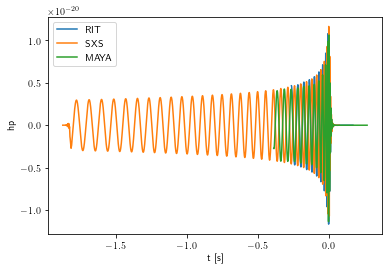

In [22]:
plt.plot(hp_rit.sample_times,hp_rit,label='RIT')
plt.plot(hp_sxs.sample_times,hp_sxs,label='SXS')
plt.plot(hp_maya.sample_times,hp_maya,label='MAYA')

plt.xlabel('t [s]')
plt.ylabel('hp')
plt.legend()
plt.show()

Find all the SXS BBH non-precessing cases with Massratio in [3,3.2]. In the sxs_root_folder you are supposed to store each metadata.json file as, for instance,  sxs_root_folder/SXS_BBH_0305/metadata.json

In [2]:
import numpy as np

tag='Non-Precessing';
sxs_root_folder="/work/francisco.jimenez/SXS/data"
conditions=np.asarray([['BHBH',None],['Non-Precessing',None],['Massratio',['>=3','<=3.2']]])
values=nr.SXS_Catalogue_Select_cases(sxs_root_folder,conditions,sortcolumn=2,
                                      best_resolution=True,verbose=True,tolerance=0.001)

/work/francisco.jimenez/venv_sc/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Found  2019 metadata.json files
Wrong conditional keyword:  BHBH
             Tag         q $\chi_{eff}$ $\chi_{p}$             $\chi_{1}$             $\chi_{2}$                                              name
0   SXS:BBH:2148  3.000012    -0.075075   0.000001   [0.0, -0.0, -0.0001]      [-0.0, 0.0, -0.3]                                         0276/Lev3
1   SXS:BBH:1182  3.000014     -0.00005        0.0  [-0.0, -0.0, -0.0001]    [0.0, -0.0, 0.0001]           BBH_SKS_d13.2_q3_sA_0_0_0_sB_0_0_0/Lev5
2   SXS:BBH:2137  3.000015        -0.55   0.000001      [0.0, -0.0, -0.6]       [0.0, 0.0, -0.4]                                         0265/Lev3
3   SXS:BBH:2157  3.000041      0.44995        0.0    [0.0, -0.0, 0.3999]   [-0.0, -0.0, 0.6001]                                         0285/Lev3
4   SXS:BBH:2163  3.000059     0.599975        0.0   [-0.0, -0.0, 0.5999]     [0.0, 0.0, 0.6002]                                         0291/Lev3
5   SXS:BBH:0288  3.000062         0.35        0.0   